In [1]:
%load_ext autoreload
%autoreload 2

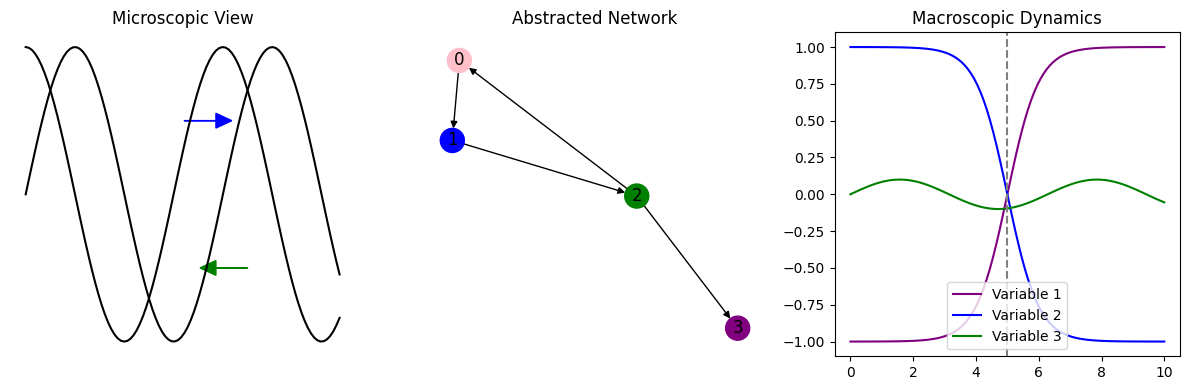

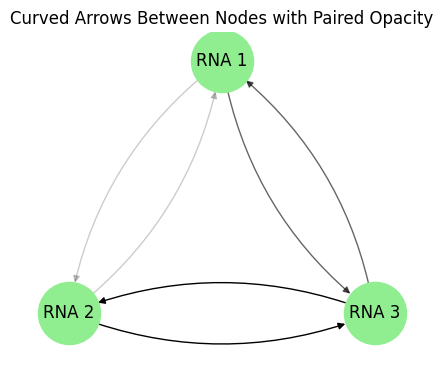

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Create figure
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Left Panel: Microscopic System
axs[0].plot(np.sin(np.linspace(0, 10, 100)), label='Component 1', color='black')
axs[0].plot(np.cos(np.linspace(0, 10, 100)), label='Component 2', color='black')
axs[0].arrow(50, 0.5, 10, 0, head_width=0.1, head_length=5, fc='blue', ec='blue')
axs[0].arrow(70, -0.5, -10, 0, head_width=0.1, head_length=5, fc='green', ec='green')
axs[0].set_title("Microscopic View")
axs[0].axis('off')

# Middle Panel: Network Representation
G = nx.DiGraph()
G.add_edges_from([(0, 1), (1, 2), (2, 0), (2, 3)])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=['pink', 'blue', 'green', 'purple'], ax=axs[1], edge_color='black')
axs[1].set_title("Abstracted Network")

# Right Panel: Dynamics Plot
t = np.linspace(0, 10, 100)
axs[2].plot(t, np.tanh(t - 5), label='Variable 1', color='purple')
axs[2].plot(t, -np.tanh(t - 5), label='Variable 2', color='blue')
axs[2].plot(t, 0.1 * np.sin(t), label='Variable 3', color='green')
axs[2].axvline(5, linestyle='dashed', color='gray')
axs[2].legend()
axs[2].set_title("Macroscopic Dynamics")

plt.tight_layout()
plt.show()


# New Figure: Curved Arrows for Three Nodes
fig, ax = plt.subplots(figsize=(4, 4))
G = nx.DiGraph()
edges = [("RNA 1", "RNA 2"), ("RNA 2", "RNA 3"), ("RNA 3", "RNA 1"), ("RNA 2", "RNA 1"), ("RNA 3", "RNA 2"), ("RNA 1", "RNA 3")]
G.add_edges_from(edges)
for node in G.nodes():
    G.add_edge(node, node)
pos = {"RNA 1": (0, 1), "RNA 2": (-1, 0), "RNA 3": (1, 0)}

# Assign the same opacity for each pair of edges between the same nodes
edge_opacity = {}
opacities = [0.2, 0.6, 1.0]
opacities_iter = iter(opacities)
for u, v in edges:
    if (v, u) in edge_opacity:
        edge_opacity[(u, v)] = edge_opacity[(v, u)]
    else:
        edge_opacity[(u, v)] = next(opacities_iter)

edge_colors = [(0, 0, 0, edge_opacity[edge]) for edge in edges]
nx.draw(G, pos, with_labels=True, labels={node: node for node in G.nodes()}, node_color='lightgreen', edge_color=edge_colors, arrows=True, connectionstyle='arc3,rad=0.2', ax=ax, node_size=2000, node_shape='o')
ax.set_title("Curved Arrows Between Nodes with Paired Opacity")
plt.tight_layout()
plt.show()


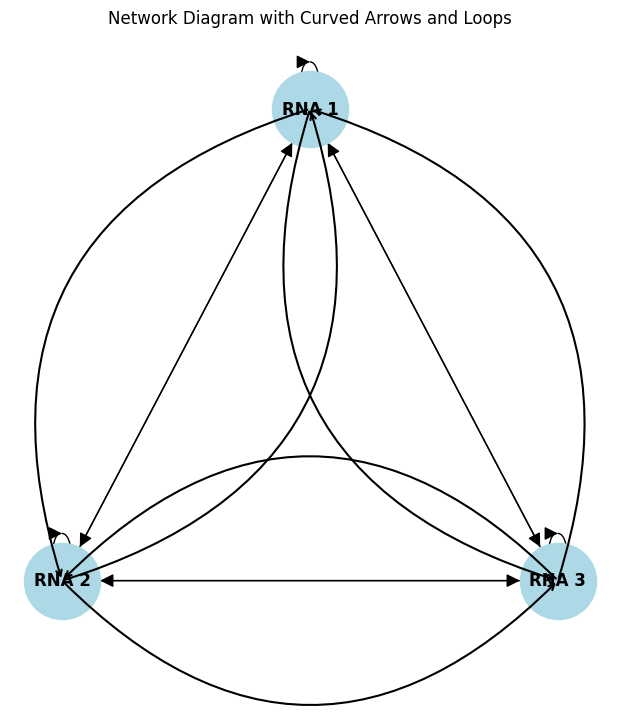

In [33]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = ["RNA 1", "RNA 2", "RNA 3"]
G.add_nodes_from(nodes)

# Add edges (two arrows between each pair of nodes and one loop for each node)
edges = [("RNA 1", "RNA 2"), ("RNA 2", "RNA 1"),
         ("RNA 2", "RNA 3"), ("RNA 3", "RNA 2"),
         ("RNA 3", "RNA 1"), ("RNA 1", "RNA 3")]

# Add loops for each node
loops = [("RNA 1", "RNA 1"), ("RNA 2", "RNA 2"), ("RNA 3", "RNA 3")]
edges.extend(loops)

G.add_edges_from(edges)

# Position the nodes
pos = {"RNA 1": np.array([0, 1]), "RNA 2": np.array([-1, 0]), "RNA 3": np.array([1, 0])}

# Draw the network
plt.figure(figsize=(6, 6))

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold", arrowsize=20)

# Draw curved arrows
for (u, v) in edges:
    if u != v:
        # Create curved edges
        plt.annotate('', xy=pos[v], xytext=pos[u],
                     arrowprops=dict(arrowstyle="->", lw=1.5, color="black", connectionstyle="arc3,rad=0.5"))

plt.title("Network Diagram with Curved Arrows and Loops")
plt.show()


# Create a new dataset combining ruggedness

In [ ]:
# fn = '../data/raw/summarise_simulation/2024_11_21_144918/tabulated_mutation_info.csv'
# fn = '../data/raw/summarise_simulation/2024_11_21_160955/tabulated_mutation_info.csv'
fn = '../data/raw/summarise_simulation/2024_12_05_210221/tabulated_mutation_info.csv'
# fn = './data/simulate_circuits/2025_01_29__18_12_38/tabulated_mutation_info.json'

dir_ruggedness = 'data/07_ruggedness/2025_02_07__15_33_55'
ruggedness = np.load(os.path.join(dir_ruggedness, 'ruggedness.npy'))
analytics = load_json_as_dict(os.path.join(dir_ruggedness, 'analytics.json'))
resimulate_analytics = True

# fn_test_data = '../data/raw/summarise_simulation/2023_07_17_222747/tabulated_mutation_info.csv'
# data = pd.concat([pd.read_csv(fn), pd.read_csv(fn_test_data)])
data = pd.read_json(fn) if fn.endswith('.json') else pd.read_csv(fn)
len(data)